<ipython-input-62-22f52bcbf881>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(21,22)):


<ipython-input-62-22f52bcbf881>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')
<ipython-input-62-22f52bcbf881>:144: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


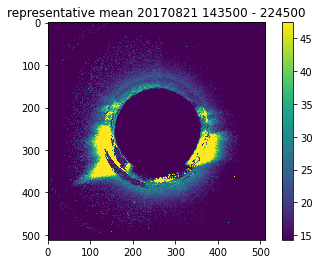

<ipython-input-62-22f52bcbf881>:152: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-62-22f52bcbf881>:162: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


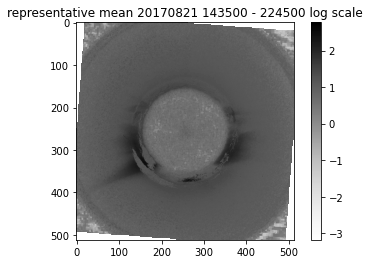

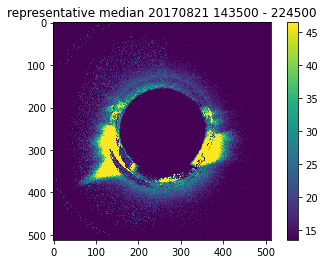

<ipython-input-62-22f52bcbf881>:170: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-62-22f52bcbf881>:181: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


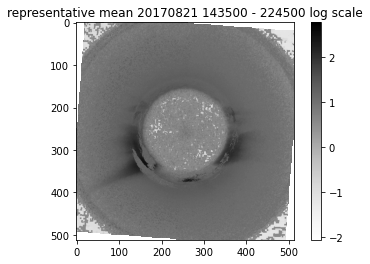

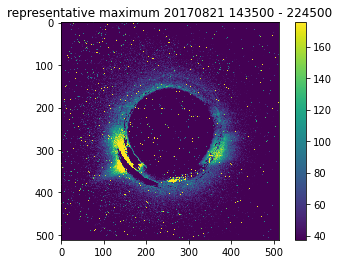

<ipython-input-62-22f52bcbf881>:189: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


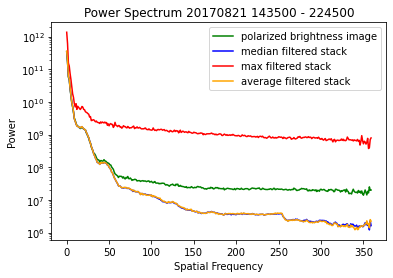

finished



In [62]:
# FOR B


import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import matplotlib
from tqdm import tqdm_notebook

from scipy.fft import fft2 # 2-D discrete Fourier Transform
from scipy.fft import fftshift # Shift the zero-frequency component to the center of the spectrum.
#from radialProfile.py import azimuthalAverage
import radialProfile
#importlib.reload(radialProfile)
azimuthalAverage = radialProfile.azimuthalAverage






for i in tqdm_notebook(range(21,22)):

    day = str(i)
    Main_Input = '201708{}'.format(day)
    
    #"/Users/crura/Desktop/Research/sequential_images/processed/201407{}/".format(day)
    path = "/Users/crura/Desktop/Research/eclipse/processed/201708{}/".format(day)
    parent_list = os.listdir("/Users/crura/Desktop/Research/eclipse/processed/201708{}".format(day))
    imagelist = []
    headlist = []
    for child in parent_list:
        # Ignore .DSStore file (common formatting with mac, easier to ignore than delete)
        if child == '.DS_Store':
            print('no')
            pass            #pass
        elif child == 'rep_avg.fts':
            print('no')
            pass            #pass
        elif child == 'rep_max.fts':
            print('no')
            pass            #pass
        elif child == 'rep_med.fts':
            print('no')
            pass           # pass
        elif child == '201708{}_rep_avg.fts'.format(day):
            print('no')
            pass
        elif child == '201708{}_rep_med.fts'.format(day):
            print('no')
            pass            #pass
        elif child == '201708{}_rep_max.fts'.format(day):
            print('no')
            pass            #pass
        else:
        # For each file in directory, pull up fits header and search for polarization variable 
        #print out to ensure each file has same polarization angle


            file = str(path + child)
            image_data = fits.getdata(file, ext=0)
            imagelist.append(image_data)
            head_data = fits.getheader(file)
            headlist.append(head_data)
            fits.getheader(file)
            hdul = fits.open(file)#imagelist.append(image_data)
            plt.figure()
            plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
            plt.colorbar()
            plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
            current_cmap = matplotlib.cm.get_cmap()
            current_cmap.set_bad(color='red')
            plt.title('{}'.format(child))
            if child == '20140705_133500_0P4c1B.fts':
                plt.savefig('20170821_133500_0P4c1B.png')
            #plt.show()
            plt.close()
    #         imagelist.append(image_data)
    #         plt.figure()
    #         plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
    #         plt.colorbar()
    #         plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
    #         current_cmap = matplotlib.cm.get_cmap()
    #         current_cmap.set_bad(color='red')
    #         plt.title('image_data')
    #         plt.show()


    
    # define times to write to files and titles
    
    timelist = []
    for i in headlist:
        timelist.append(i['DATE-OBS'])
    timelist.sort()
    
    avgtime = timelist[int(len(timelist)/2)]
    avgtimewrite = avgtime.replace('-','')
    avgtimewrite2 = avgtimewrite.replace('T','_')
    avgtimewrite3 = avgtimewrite2.replace(':','')

    sep = '.'
    stripped = avgtimewrite3.split(sep, 1)[0]
    timewrite = stripped + '_0P4c1B.fts'
    
    
    
    sep2 = '_'
    stripped2 = timewrite.split(sep2, 1)[0]
    timewrite_med = stripped2 + '_rep_med.fts'
    timewrite_avg = stripped2 + '_rep_avg.fts'
    timewrite_max = stripped2 + '_rep_max.fts'
    datewrite = stripped2
    
    firsttime = timelist[0]
    firsttimewrite = firsttime.replace('-','')
    firsttimewrite2 = firsttimewrite.replace('T','_')
    firsttimewrite3 = firsttimewrite2.replace(':','')
    sepfirst = '_'
    firsttimewrite4 = firsttimewrite3.split(sepfirst,1)[1]
    sepfirst2 = '.'
    firsttimewrite_final = firsttimewrite4.split(sepfirst2,1)[0]
    
    lasttime = timelist[-1]
    lasttimewrite = lasttime.replace('-','')
    lasttimewrite2 = lasttimewrite.replace('T','_')
    lasttimewrite3 = lasttimewrite2.replace(':','')
    seplast = '_'
    lasttimewrite4 = lasttimewrite3.split(seplast,1)[1]
    seplast2 = '.'
    lasttimewrite_final = lasttimewrite4.split(seplast2,1)[0]
    
    
    
    
    plt.figure()
    imcombmean = np.mean(imagelist, axis=0)
    plt.imshow(imcombmean, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmean),np.mean(imcombmean)+2*np.std(imcombmean))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative mean ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_mean201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()

    plt.figure()
    imcombmed = np.median(imagelist, axis=0)
    plt.imshow(imcombmed, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmed),np.mean(imcombmed)+2*np.std(imcombmed))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative median ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_median201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()


    plt.figure()
    imcombmax = np.max(imagelist, axis=0)
    plt.imshow(imcombmax, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmax),np.mean(imcombmax)+2*np.std(imcombmax))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative maximum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_maximum201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)
    plt.colorbar()


    F1max = fft2(imcombmax)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2max = fftshift( F1max )

    # Calculate a 2D power spectrum
    psd2Dmax = np.abs( F2max )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmax = azimuthalAverage(psd2Dmax)


    F1med = fft2(imcombmed)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2med = fftshift( F1med )

    # Calculate a 2D power spectrum
    psd2Dmed = np.abs( F2med )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmed = azimuthalAverage(psd2Dmed)


    F1mean = fft2(imcombmean)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2mean = fftshift( F1mean )

    # Calculate a 2D power spectrum
    psd2Dmean = np.abs( F2mean )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmean = azimuthalAverage(psd2Dmean)



    F1 = fft2(image_data)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = azimuthalAverage(psd2D)


    # import seaborn as sns
    # sns.set()


    plt.clf()
    plt.semilogy( psd1D ,color='green',label='polarized brightness image')
    plt.semilogy( psd1Dmed ,color='blue',label='median filtered stack')
    plt.semilogy( psd1Dmax ,color='red',label='max filtered stack')
    plt.semilogy( psd1Dmean ,color='orange',label='average filtered stack')
    plt.xlabel('Spatial Frequency')
    plt.ylabel('Power')
    plt.title('Power Spectrum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    plt.legend()

    #plt.savefig('Power_Spectrum 2017-08-{}'.format(day))


    plt.show()

    


    #head = fits.getheader(path+'20170821_180500_0P4c1A.fts'.format(day))
    head = fits.getheader('/Users/crura/Desktop/Research/eclipse/processed/' + timewrite)
    old = head['DATE-OBS']
    head['DATE-OBS'] = (old, '{} - {}'.format(timelist[0],timelist[-1]))
    #head['DATE-OBS'] = '{} - {}'.format(timelist[0],timelist[-1])


    pathnew = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images/'

    hdumean = fits.PrimaryHDU(data=imcombmean,header=head)
    #hdumean.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_avg.fts',overwrite=True)
    hdumean.writeto(pathnew+timewrite_avg,overwrite=True)

    hdumed = fits.PrimaryHDU(data=imcombmed,header=head)
    #hdumed.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_med.fts',overwrite=True)
    hdumed.writeto(pathnew+timewrite_med,overwrite=True)

    hdumax = fits.PrimaryHDU(data=imcombmax,header=head)
    #hdumax.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_max.fts',overwrite=True)
    hdumax.writeto(pathnew+timewrite_max,overwrite=True)



    print('finished')




    
    
    
    
    
    
    








In [42]:
sep3 = '_'
datewrite = stripped.split(sep3, 1)[0]
datewrite, stripped2, timewrite

('20170821', '20170821', '20170821_184000_0P4c1B.fts')

In [56]:
lasttime = timelist[-1]
lasttimewrite = lasttime.replace('-','')
lasttimewrite2 = lasttimewrite.replace('T','_')
lasttimewrite3 = lasttimewrite2.replace(':','')
seplast = '_'
lasttimewrite4 = lasttimewrite3.split(seplast,1)[1]
seplast2 = '.'
lasttimewrite_final = lasttimewrite4.split(seplast2,1)[0]

lasttimewrite_final

'143500'

In [24]:
avgtime = timelist[int(len(timelist)/2)]
avgtimewrite = avgtime.replace('-','')
avgtimewrite2 = avgtimewrite.replace('T','_')
avgtimewrite3 = avgtimewrite2.replace(':','')

sep = '.'
stripped = avgtimewrite3.split(sep, 1)[0]
timewrite = stripped + '_0P4c1B.fts'

sep2 = '_'
stripped2 = timewrite.split(sep2, 1)[0]
timewrite_med = stripped2 + '_rep_med.fts'
timewrite_avg = stripped2 + '_rep_avg.fts'
timewrite_max = stripped2 + '_rep_max.fts'
timewrite_med, timewrite_avg, timewrite_max

('20170821_rep_med.fts', '20170821_rep_avg.fts', '20170821_rep_max.fts')

In [11]:
import numpy as np

In [10]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/Chris/miniconda/bin:/Users/Chris/miniconda/bin:/Users/Chris/miniconda/condabin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/2.7/bin:/Library/Frameworks/Python.framework/Versions/3.4/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin


In [9]:
import sys
sys.path.append('/Users/Chris/miniconda/bin/python3')
sys.PYTHONPATH.append('/Users/Chris/miniconda/bin/python3')

AttributeError: module 'sys' has no attribute 'PYTHONPATH'

# WORKING PROGRAM BELOW

<ipython-input-40-da1bcc00ccb1>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(22,29)):


<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')
<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


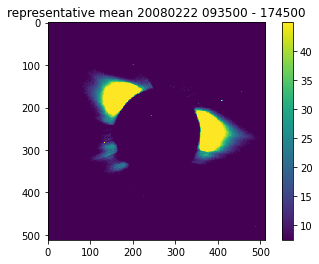

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


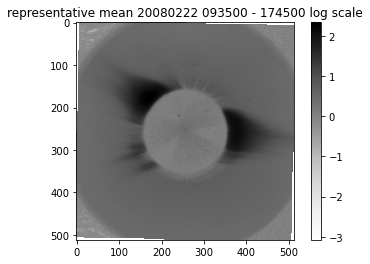

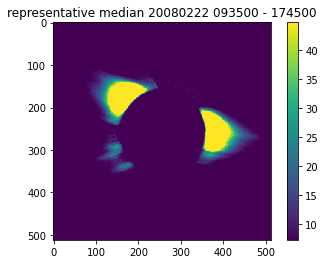

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


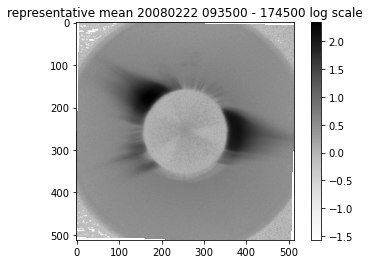

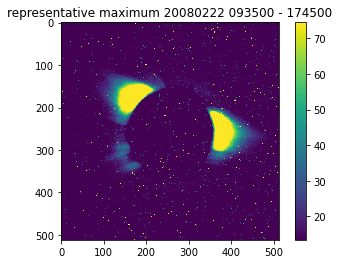

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


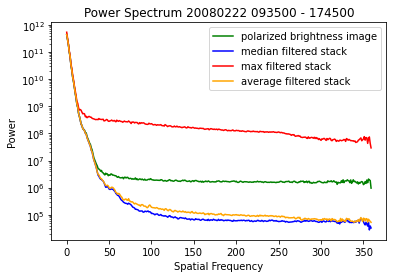

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


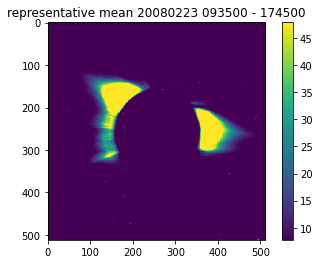

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


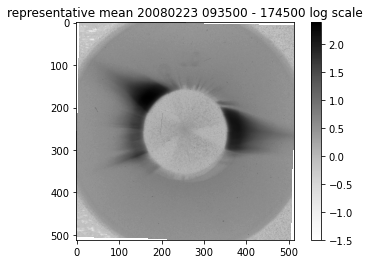

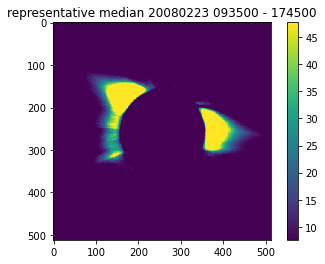

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


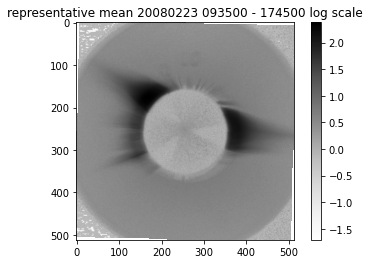

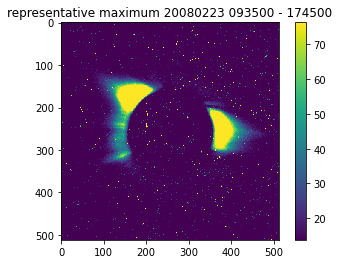

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


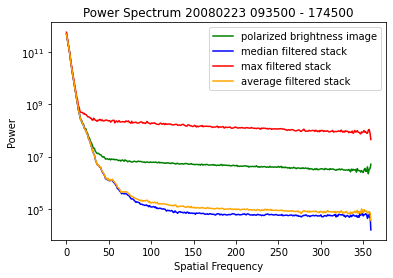

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


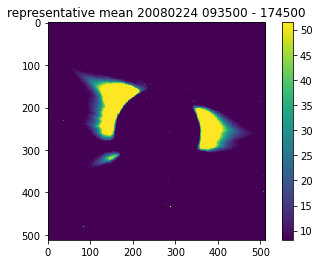

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


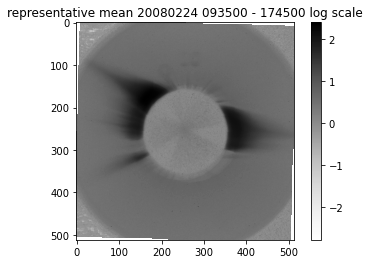

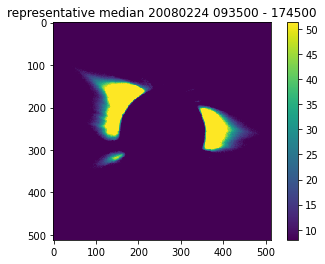

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


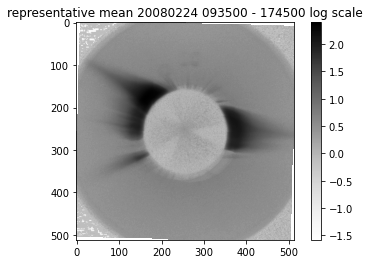

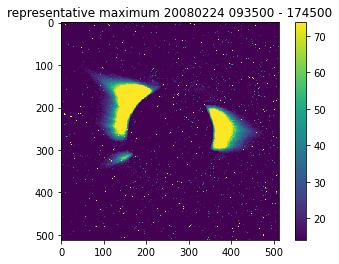

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


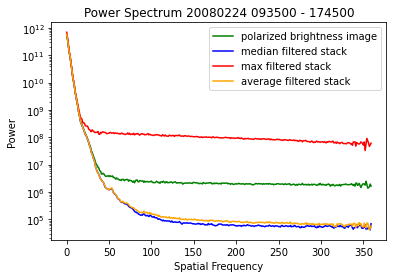

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


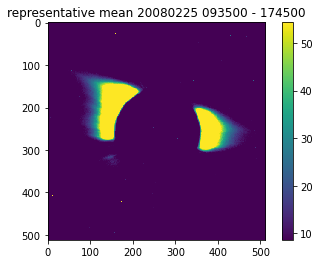

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


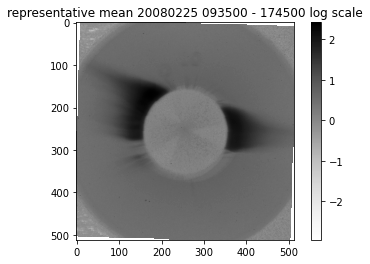

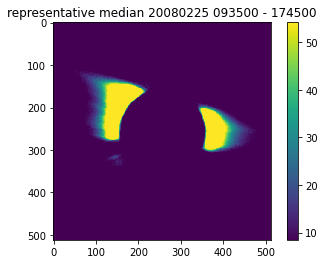

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


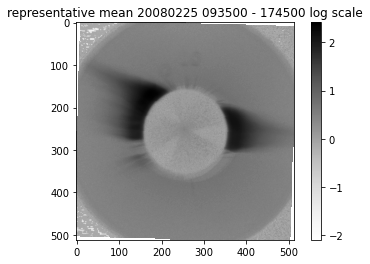

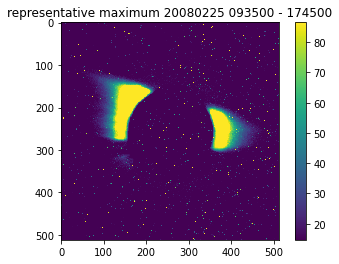

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


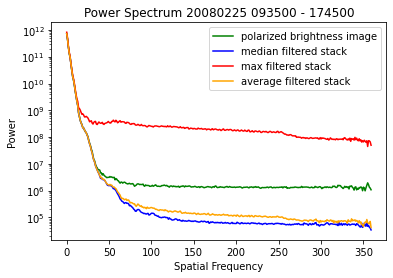

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


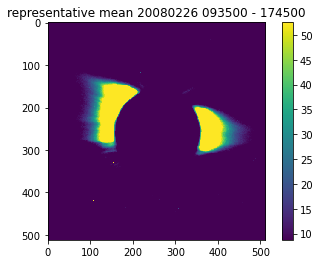

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


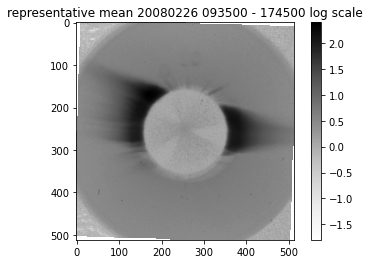

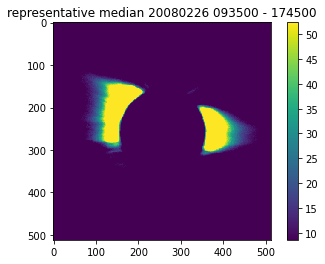

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


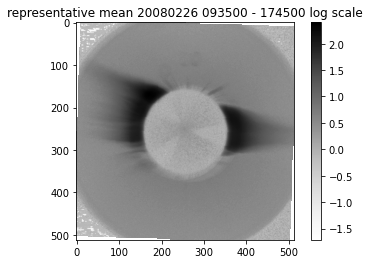

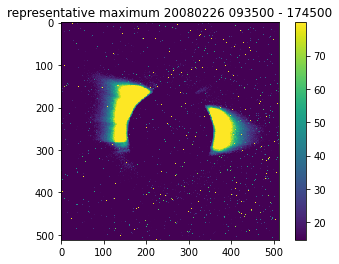

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


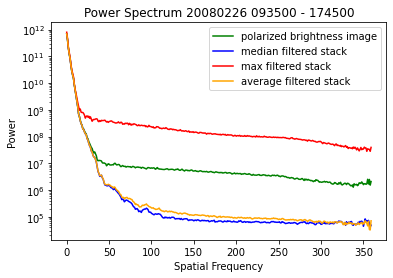

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


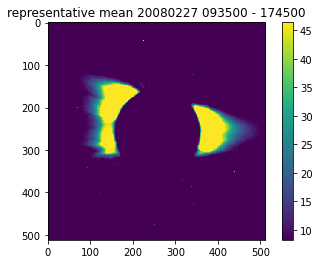

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


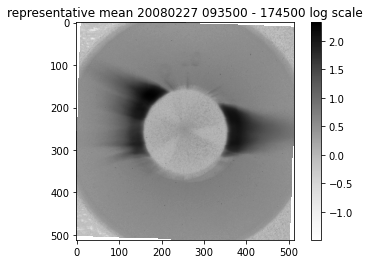

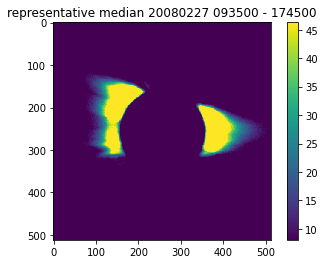

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


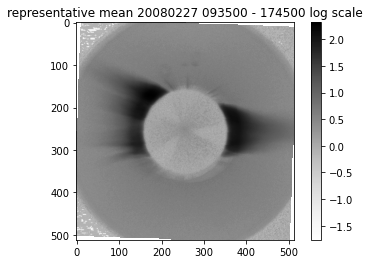

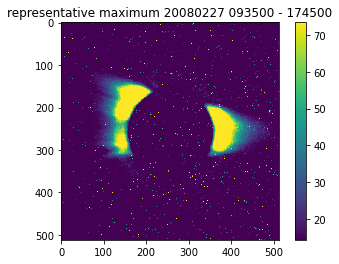

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


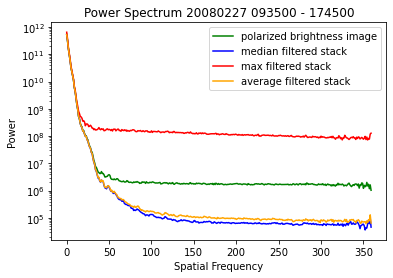

<ipython-input-40-da1bcc00ccb1>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-40-da1bcc00ccb1>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


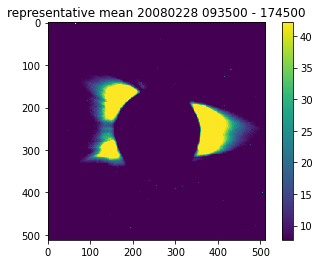

<ipython-input-40-da1bcc00ccb1>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


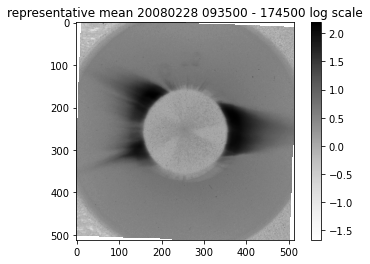

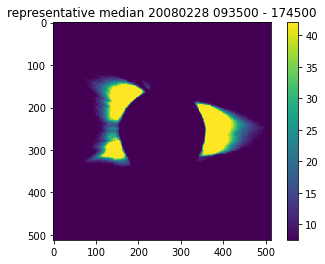

<ipython-input-40-da1bcc00ccb1>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-40-da1bcc00ccb1>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


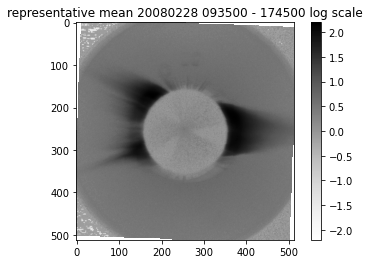

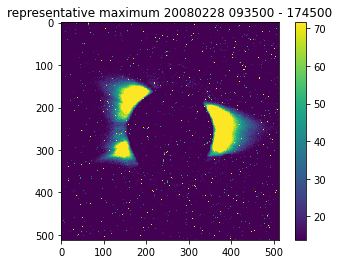

<ipython-input-40-da1bcc00ccb1>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


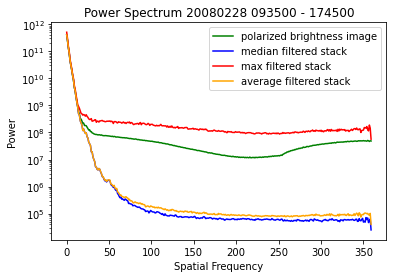

finished



In [40]:
# FOR A


import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import matplotlib
from tqdm import tqdm_notebook

from scipy.fft import fft2 # 2-D discrete Fourier Transform
from scipy.fft import fftshift # Shift the zero-frequency component to the center of the spectrum.
#from radialProfile.py import azimuthalAverage
import radialProfile
#importlib.reload(radialProfile)
azimuthalAverage = radialProfile.azimuthalAverage



path_to_folder = "/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/A copy"


for i in tqdm_notebook(range(22,29)):

    day = str(i)
    Main_Input = '200802{}'.format(day)
    
    #"/Users/crura/Desktop/Research/sequential_images/processed/201407{}/".format(day)
    path = path_to_folder+"/" + Main_Input+"/processed/" #201708{}/".format(day)
    parent_list = os.listdir(path_to_folder+"/" + Main_Input + '/processed') #201708{}".format(day))
    imagelist = []
    headlist = []
    for child in parent_list:
        # Ignore .DSStore file (common formatting with mac, easier to ignore than delete)
        if child == '.DS_Store':
            print('no')
            pass            #pass
        elif child == 'rep_avg.fts':
            print('no')
            pass            #pass
        elif child == 'rep_max.fts':
            print('no')
            pass            #pass
        elif child == 'rep_med.fts':
            print('no')
            pass           # pass
        elif child == Main_Input + '_rep_avg.fts':
            print('no')
            pass
        elif child == Main_Input + '_rep_med.fts':
            print('no')
            pass            #pass
        elif child == Main_Input + '_rep_max.fts':
            print('no')
            pass            #pass
        else:
        # For each file in directory, pull up fits header and search for polarization variable 
        #print out to ensure each file has same polarization angle


            file = str(path + child)
            image_data = fits.getdata(file, ext=0)
            imagelist.append(image_data)
            head_data = fits.getheader(file)
            headlist.append(head_data)
            fits.getheader(file)
            hdul = fits.open(file)#imagelist.append(image_data)
            plt.figure()
            plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
            plt.colorbar()
            plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
            current_cmap = matplotlib.cm.get_cmap()
            current_cmap.set_bad(color='red')
            plt.title('{}'.format(child))
            if child == '20140705_133500_0P4c1A.fts':
                plt.savefig('20170821_133500_0P4c1A.png')
            #plt.show()
            plt.close()
    #         imagelist.append(image_data)
    #         plt.figure()
    #         plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
    #         plt.colorbar()
    #         plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
    #         current_cmap = matplotlib.cm.get_cmap()
    #         current_cmap.set_bad(color='red')
    #         plt.title('image_data')
    #         plt.show()


    
    # define times to write to files and titles
    
    timelist = []
    for i in headlist:
        timelist.append(i['DATE-OBS'])
    timelist.sort()
    
    avgtime = timelist[int(len(timelist)/2)]
    avgtimewrite = avgtime.replace('-','')
    avgtimewrite2 = avgtimewrite.replace('T','_')
    avgtimewrite3 = avgtimewrite2.replace(':','')

    sep = '.'
    strippedold = avgtimewrite3.split(sep, 1)[0]
    stripped = strippedold[:-2] + '00'
    timewrite = stripped + '_0P4c1A.fts'
    
    
    
    sep2 = '_'
    stripped2 = timewrite.split(sep2, 1)[0]
    timewrite_med = stripped2 + '_rep_med.fts'
    timewrite_avg = stripped2 + '_rep_avg.fts'
    timewrite_max = stripped2 + '_rep_max.fts'
    datewrite = stripped2
    
    firsttime = timelist[0]
    firsttimewrite = firsttime.replace('-','')
    firsttimewrite2 = firsttimewrite.replace('T','_')
    firsttimewrite3 = firsttimewrite2.replace(':','')
    sepfirst = '_'
    firsttimewrite4 = firsttimewrite3.split(sepfirst,1)[1]
    sepfirst2 = '.'
    firsttimewrite_final = firsttimewrite4.split(sepfirst2,1)[0]
    
    lasttime = timelist[-1]
    lasttimewrite = lasttime.replace('-','')
    lasttimewrite2 = lasttimewrite.replace('T','_')
    lasttimewrite3 = lasttimewrite2.replace(':','')
    seplast = '_'
    lasttimewrite4 = lasttimewrite3.split(seplast,1)[1]
    seplast2 = '.'
    lasttimewrite_final = lasttimewrite4.split(seplast2,1)[0]
    
    
    
    
    plt.figure()
    imcombmean = np.mean(imagelist, axis=0)
    plt.imshow(imcombmean, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmean),np.mean(imcombmean)+2*np.std(imcombmean))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative mean ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_mean201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()

    plt.figure()
    imcombmed = np.median(imagelist, axis=0)
    plt.imshow(imcombmed, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmed),np.mean(imcombmed)+2*np.std(imcombmed))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative median ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_median201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()


    plt.figure()
    imcombmax = np.max(imagelist, axis=0)
    plt.imshow(imcombmax, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmax),np.mean(imcombmax)+2*np.std(imcombmax))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative maximum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_maximum201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)
    plt.colorbar()


    F1max = fft2(imcombmax)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2max = fftshift( F1max )

    # Calculate a 2D power spectrum
    psd2Dmax = np.abs( F2max )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmax = azimuthalAverage(psd2Dmax)


    F1med = fft2(imcombmed)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2med = fftshift( F1med )

    # Calculate a 2D power spectrum
    psd2Dmed = np.abs( F2med )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmed = azimuthalAverage(psd2Dmed)


    F1mean = fft2(imcombmean)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2mean = fftshift( F1mean )

    # Calculate a 2D power spectrum
    psd2Dmean = np.abs( F2mean )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmean = azimuthalAverage(psd2Dmean)



    F1 = fft2(image_data)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = azimuthalAverage(psd2D)


    # import seaborn as sns
    # sns.set()


    plt.clf()
    plt.semilogy( psd1D ,color='green',label='polarized brightness image')
    plt.semilogy( psd1Dmed ,color='blue',label='median filtered stack')
    plt.semilogy( psd1Dmax ,color='red',label='max filtered stack')
    plt.semilogy( psd1Dmean ,color='orange',label='average filtered stack')
    plt.xlabel('Spatial Frequency')
    plt.ylabel('Power')
    plt.title('Power Spectrum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    plt.legend()

    #plt.savefig('Power_Spectrum 2017-08-{}'.format(day))


    plt.show()

    


    #head = fits.getheader(path+'20170821_180500_0P4c1A.fts'.format(day))
    head = fits.getheader(path_to_folder+"/" + Main_Input+"/processed/"+ timewrite)
    old = head['DATE-OBS']
    head['DATE-OBS'] = (old, '{} - {}'.format(timelist[0],timelist[-1]))
    #head['DATE-OBS'] = '{} - {}'.format(timelist[0],timelist[-1])


    pathnew = path_to_folder+"/" + 'Rep_Images/'

    hdumean = fits.PrimaryHDU(data=imcombmean,header=head)
    #hdumean.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_avg.fts',overwrite=True)
    hdumean.writeto(pathnew+timewrite_avg,overwrite=True)

    hdumed = fits.PrimaryHDU(data=imcombmed,header=head)
    #hdumed.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_med.fts',overwrite=True)
    hdumed.writeto(pathnew+timewrite_med,overwrite=True)

    hdumax = fits.PrimaryHDU(data=imcombmax,header=head)
    #hdumax.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_max.fts',overwrite=True)
    hdumax.writeto(pathnew+timewrite_max,overwrite=True)



    print('finished')




    
    
    
    
    
    
    









In [ ]:
import sunpy
rep_new_file_path = pathnew+'201708{}_rep_med.fts'
repdata, repheader = sunpy.io.fits.read(rep_new_file_path)[0] 
repheader['cunit1'] = 'arcsec' 
repheader['cunit2'] = 'arcsec'

repmap = sunpy.map.Map(correpdata,correpheader)

In [63]:
Main_Input + '_rep_avg.fts'

'20170821_rep_avg.fts'

<ipython-input-42-260536f033bd>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(22,29)):


<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')
<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


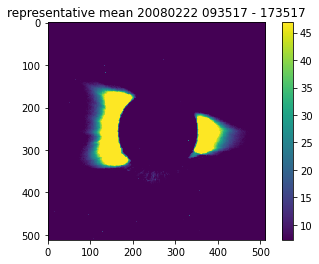

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


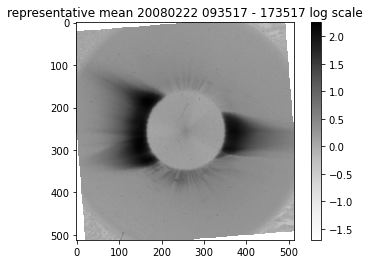

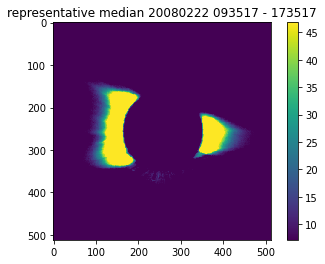

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


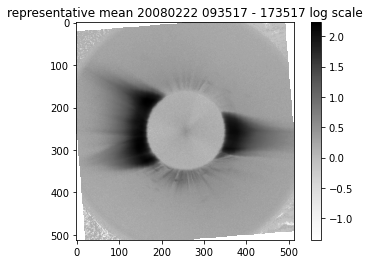

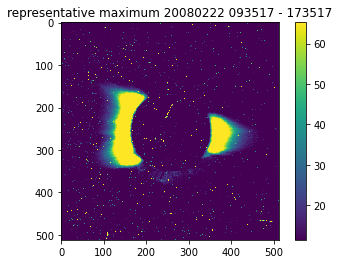

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


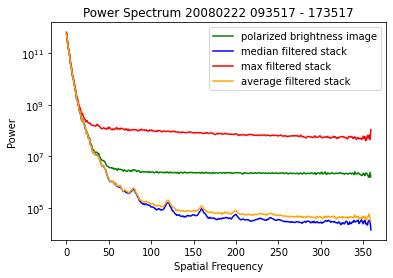

<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


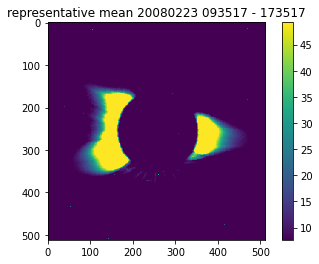

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


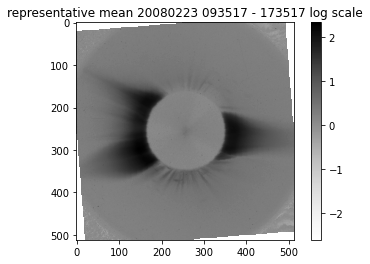

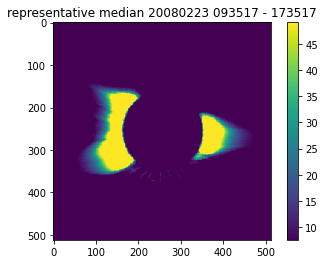

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


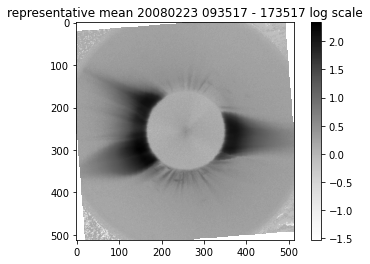

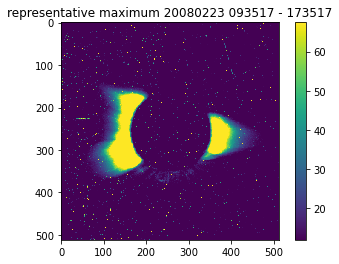

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


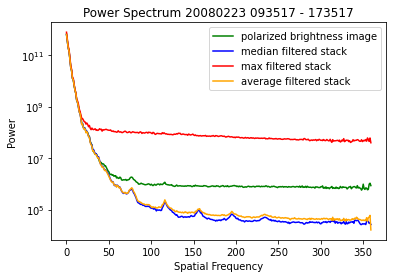

<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


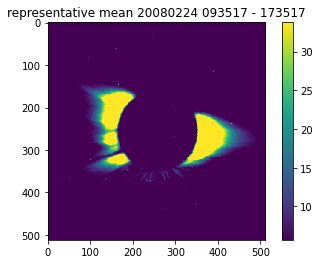

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


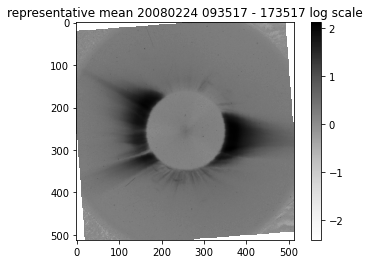

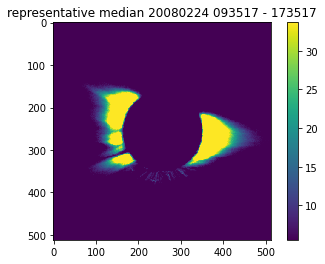

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


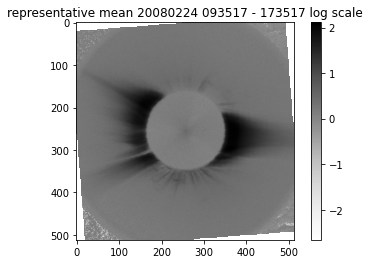

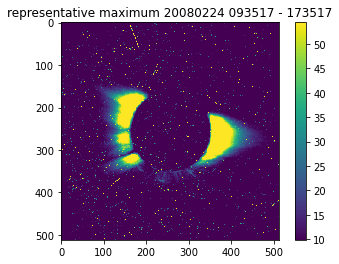

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


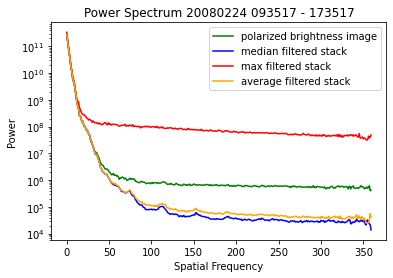

finished


<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')
<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


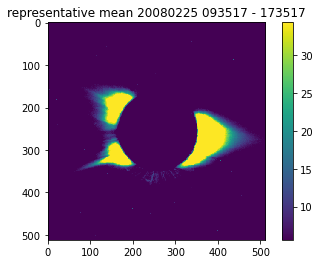

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


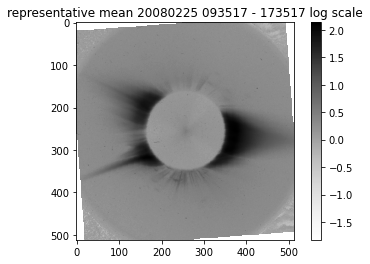

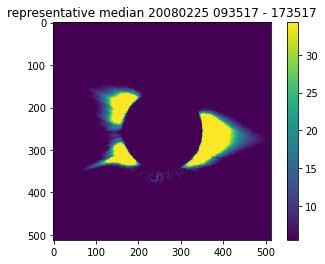

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


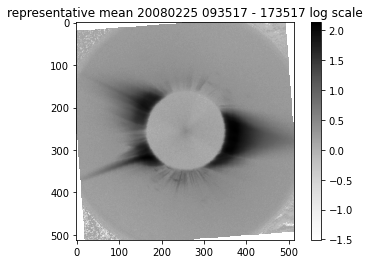

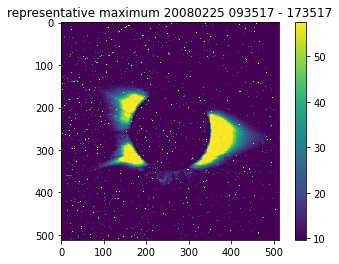

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


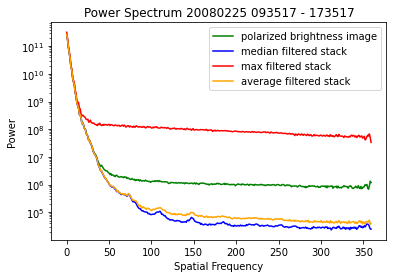

<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


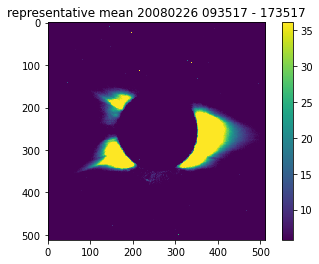

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


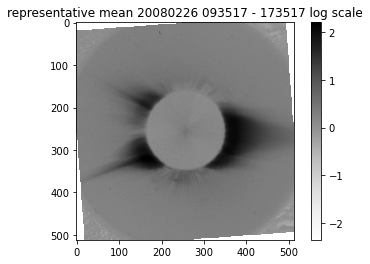

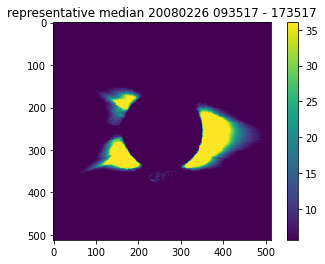

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


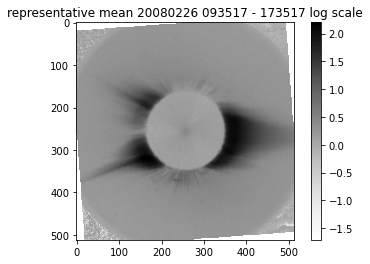

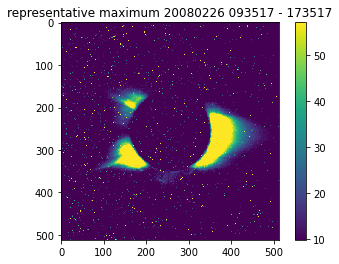

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


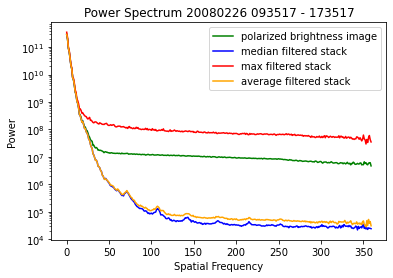

<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


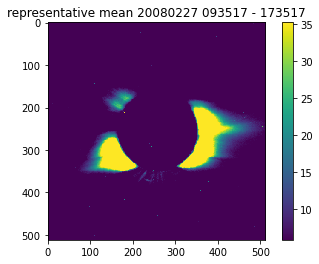

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


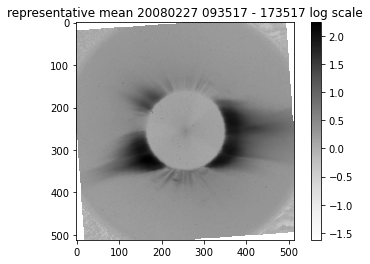

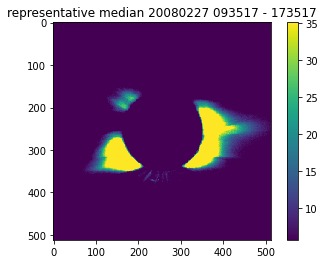

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


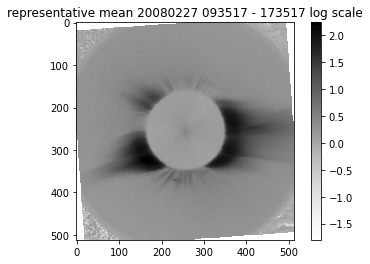

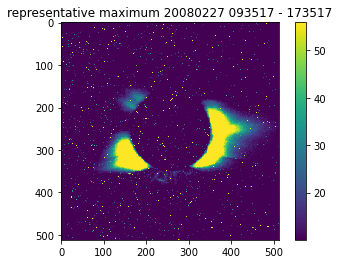

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


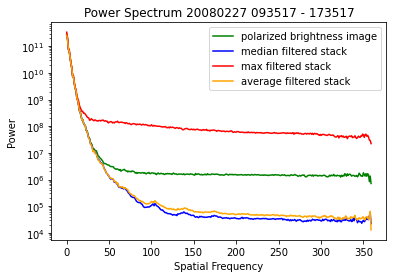

<ipython-input-42-260536f033bd>:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


finished


<ipython-input-42-260536f033bd>:145: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


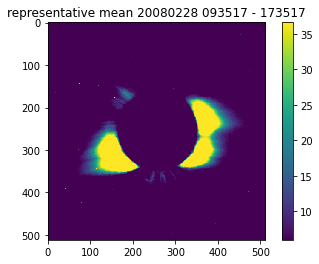

<ipython-input-42-260536f033bd>:153: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:163: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


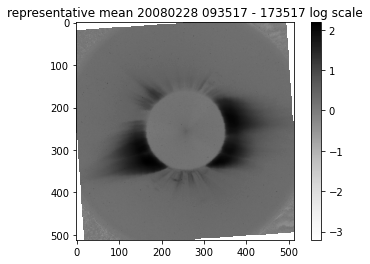

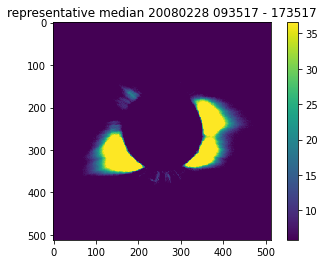

<ipython-input-42-260536f033bd>:171: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
<ipython-input-42-260536f033bd>:182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  current_cmap.set_bad(color='red')


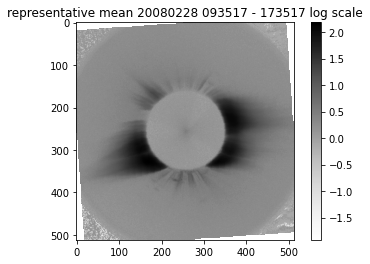

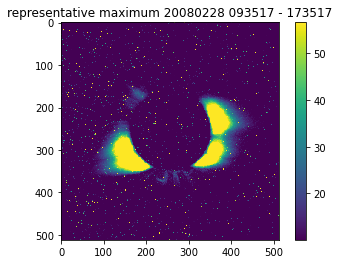

<ipython-input-42-260536f033bd>:190: RuntimeWarning: divide by zero encountered in log10
  plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)


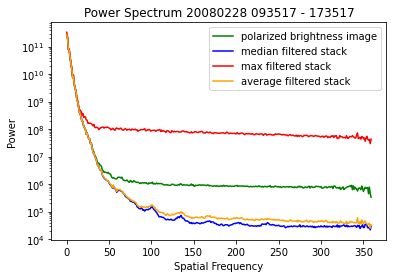

finished



In [42]:
# FOR B


import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import matplotlib
from tqdm import tqdm_notebook

from scipy.fft import fft2 # 2-D discrete Fourier Transform
from scipy.fft import fftshift # Shift the zero-frequency component to the center of the spectrum.
#from radialProfile.py import azimuthalAverage
import radialProfile
#importlib.reload(radialProfile)
azimuthalAverage = radialProfile.azimuthalAverage


path_to_folder = "/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/B copy"



for i in tqdm_notebook(range(22,29)):

    day = str(i)
    Main_Input = '200802{}'.format(day)
    
    #"/Users/crura/Desktop/Research/sequential_images/processed/201407{}/".format(day)
    path = path_to_folder+"/" + Main_Input+"/processed/" #201708{}/".format(day)
    parent_list = os.listdir(path_to_folder+"/" + Main_Input + '/processed') #201708{}".format(day))
    imagelist = []
    headlist = []
    for child in parent_list:
        # Ignore .DSStore file (common formatting with mac, easier to ignore than delete)
        if child == '.DS_Store':
            print('no')
            pass            #pass
        elif child == 'rep_avg.fts':
            print('no')
            pass            #pass
        elif child == 'rep_max.fts':
            print('no')
            pass            #pass
        elif child == 'rep_med.fts':
            print('no')
            pass           # pass
        elif child == Main_Input + '_rep_avg.fts':
            print('no')
            pass
        elif child == Main_Input + '_rep_med.fts':
            print('no')
            pass            #pass
        elif child == Main_Input + '_rep_max.fts':
            print('no')
            pass            #pass
        else:
        # For each file in directory, pull up fits header and search for polarization variable 
        #print out to ensure each file has same polarization angle


            file = str(path + child)
            image_data = fits.getdata(file, ext=0)
            imagelist.append(image_data)
            head_data = fits.getheader(file)
            headlist.append(head_data)
            fits.getheader(file)
            hdul = fits.open(file)#imagelist.append(image_data)
            plt.figure()
            plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
            plt.colorbar()
            plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
            current_cmap = matplotlib.cm.get_cmap()
            current_cmap.set_bad(color='red')
            plt.title('{}'.format(child))
            if child == '20140705_133500_0P4c1B.fts':
                plt.savefig('20170821_133500_0P4c1B.png')
            #plt.show()
            plt.close()
    #         imagelist.append(image_data)
    #         plt.figure()
    #         plt.imshow(image_data, cmap='viridis',vmin=0,interpolation='nearest')
    #         plt.colorbar()
    #         plt.clim(np.mean(image_data),np.mean(image_data)+2*np.std(image_data))
    #         current_cmap = matplotlib.cm.get_cmap()
    #         current_cmap.set_bad(color='red')
    #         plt.title('image_data')
    #         plt.show()


    
    # define times to write to files and titles
    
    timelist = []
    for i in headlist:
        timelist.append(i['DATE-OBS'])
    timelist.sort()
    
    avgtime = timelist[int(len(timelist)/2)]
    avgtimewrite = avgtime.replace('-','')
    avgtimewrite2 = avgtimewrite.replace('T','_')
    avgtimewrite3 = avgtimewrite2.replace(':','')

    sep = '.'
    strippedold = avgtimewrite3.split(sep, 1)[0]
    stripped = strippedold[:-2] + '00'
    timewrite = stripped + '_0P4c1B.fts'
    
    
    
    sep2 = '_'
    stripped2 = timewrite.split(sep2, 1)[0]
    timewrite_med = stripped2 + '_rep_med.fts'
    timewrite_avg = stripped2 + '_rep_avg.fts'
    timewrite_max = stripped2 + '_rep_max.fts'
    datewrite = stripped2
    
    firsttime = timelist[0]
    firsttimewrite = firsttime.replace('-','')
    firsttimewrite2 = firsttimewrite.replace('T','_')
    firsttimewrite3 = firsttimewrite2.replace(':','')
    sepfirst = '_'
    firsttimewrite4 = firsttimewrite3.split(sepfirst,1)[1]
    sepfirst2 = '.'
    firsttimewrite_final = firsttimewrite4.split(sepfirst2,1)[0]
    
    lasttime = timelist[-1]
    lasttimewrite = lasttime.replace('-','')
    lasttimewrite2 = lasttimewrite.replace('T','_')
    lasttimewrite3 = lasttimewrite2.replace(':','')
    seplast = '_'
    lasttimewrite4 = lasttimewrite3.split(seplast,1)[1]
    seplast2 = '.'
    lasttimewrite_final = lasttimewrite4.split(seplast2,1)[0]
    
    
    
    
    plt.figure()
    imcombmean = np.mean(imagelist, axis=0)
    plt.imshow(imcombmean, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmean),np.mean(imcombmean)+2*np.std(imcombmean))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative mean ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_mean201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmean ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()

    plt.figure()
    imcombmed = np.median(imagelist, axis=0)
    plt.imshow(imcombmed, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmed),np.mean(imcombmed)+2*np.std(imcombmed))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative median ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_median201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmed ), cmap=plt.cm.Greys)
    plt.title('representative mean ' + datewrite + ' {} - {} log scale'.format(firsttimewrite_final,lasttimewrite_final))
    plt.colorbar()


    plt.figure()
    imcombmax = np.max(imagelist, axis=0)
    plt.imshow(imcombmax, cmap='viridis',vmin=0,interpolation='nearest')
    plt.colorbar()
    plt.clim(np.mean(imcombmax),np.mean(imcombmax)+2*np.std(imcombmax))
    current_cmap = matplotlib.cm.get_cmap()
    current_cmap.set_bad(color='red')
    plt.title('representative maximum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    #plt.savefig('representative_maximum201708{}.png'.format(day))
    plt.show()


    plt.figure(1)
    plt.clf()
    plt.imshow( np.log10( imcombmax ), cmap=plt.cm.Greys)
    plt.colorbar()


    F1max = fft2(imcombmax)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2max = fftshift( F1max )

    # Calculate a 2D power spectrum
    psd2Dmax = np.abs( F2max )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmax = azimuthalAverage(psd2Dmax)


    F1med = fft2(imcombmed)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2med = fftshift( F1med )

    # Calculate a 2D power spectrum
    psd2Dmed = np.abs( F2med )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmed = azimuthalAverage(psd2Dmed)


    F1mean = fft2(imcombmean)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2mean = fftshift( F1mean )

    # Calculate a 2D power spectrum
    psd2Dmean = np.abs( F2mean )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1Dmean = azimuthalAverage(psd2Dmean)



    F1 = fft2(image_data)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = azimuthalAverage(psd2D)


    # import seaborn as sns
    # sns.set()


    plt.clf()
    plt.semilogy( psd1D ,color='green',label='polarized brightness image')
    plt.semilogy( psd1Dmed ,color='blue',label='median filtered stack')
    plt.semilogy( psd1Dmax ,color='red',label='max filtered stack')
    plt.semilogy( psd1Dmean ,color='orange',label='average filtered stack')
    plt.xlabel('Spatial Frequency')
    plt.ylabel('Power')
    plt.title('Power Spectrum ' + datewrite + ' {} - {}'.format(firsttimewrite_final,lasttimewrite_final))
    plt.legend()

    #plt.savefig('Power_Spectrum 2017-08-{}'.format(day))


    plt.show()

    


    #head = fits.getheader(path+'20170821_180500_0P4c1A.fts'.format(day))
    head = fits.getheader(path_to_folder+"/" + Main_Input+"/processed/"+ timewrite)
    old = head['DATE-OBS']
    head['DATE-OBS'] = (old, '{} - {}'.format(timelist[0],timelist[-1]))
    #head['DATE-OBS'] = '{} - {}'.format(timelist[0],timelist[-1])


    pathnew = path_to_folder+"/" + 'Rep_Images/'

    hdumean = fits.PrimaryHDU(data=imcombmean,header=head)
    #hdumean.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_avg.fts',overwrite=True)
    hdumean.writeto(pathnew+timewrite_avg,overwrite=True)

    hdumed = fits.PrimaryHDU(data=imcombmed,header=head)
    #hdumed.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_med.fts',overwrite=True)
    hdumed.writeto(pathnew+timewrite_med,overwrite=True)

    hdumax = fits.PrimaryHDU(data=imcombmax,header=head)
    #hdumax.writeto('/Users/crura/Desktop/Research/FITS Images New/downloaded fits/Background images/All images/rep_max.fts',overwrite=True)
    hdumax.writeto(pathnew+timewrite_max,overwrite=True)



    print('finished')


keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fe76168e8e0>
SunPy Map
---------
Observatory:		 STEREO B
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2010-06-28 13:35:39
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00352001 15.00352001] arcsec / pix
Reference Pixel:	 [256.695 254.255] pix
Reference Coord:	 [  12.09041214 -138.59065247] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
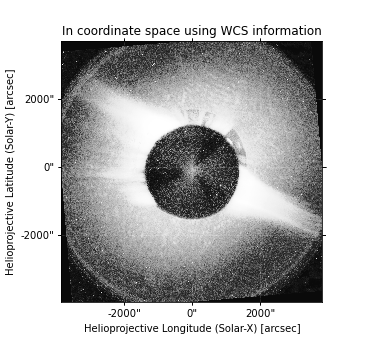
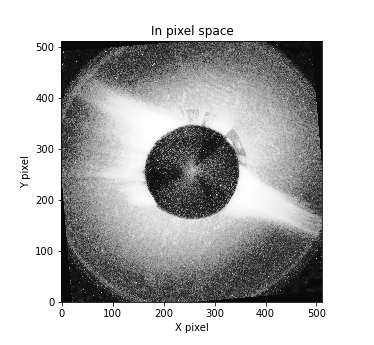
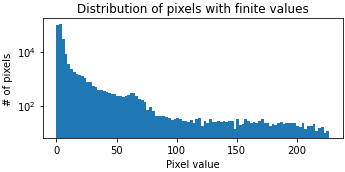

In [162]:
import sunpy.version
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import scipy as sci

pathnew = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images/'
rep_new_file_path =' pathnew+'20170821_rep_med.fts''
repdata, repheader = sunpy.io.fits.read(rep_new_file_path)[0] 
repheader['cunit1'] = 'arcsec' 
repheader['cunit2'] = 'arcsec'

repmap = sunpy.map.Map(repdata,repheader)
repmap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7faa020be1c0>
SunPy Map
---------
Observatory:		 STEREO B
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2008-02-28 13:35:17
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.00352 15.00352] arcsec / pix
Reference Pixel:	 [256.695 254.255] pix
Reference Coord:	 [  -8.9660559 -135.55757  ] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
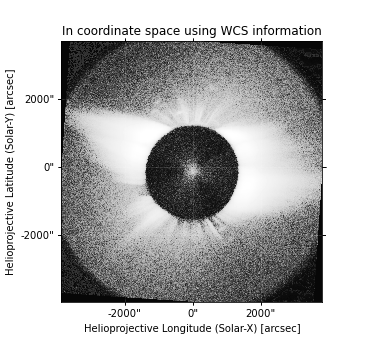
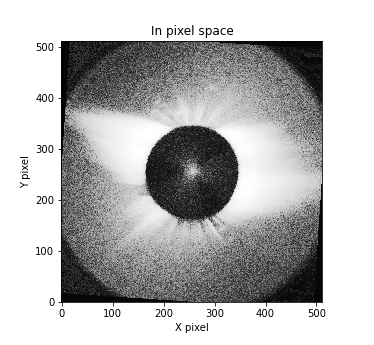
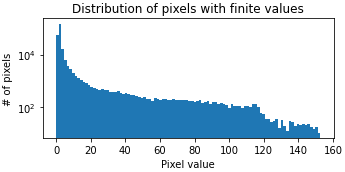

In [43]:
import sunpy.version
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import scipy as sci

pathnew2 = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images copy/'
rep_new_file_path2 = '/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/B copy/Rep_Images/20080228_rep_med.fts'
repdata2, repheader2 = sunpy.io.fits.read(rep_new_file_path2)[0] 
repheader2['cunit1'] = 'arcsec' 
repheader2['cunit2'] = 'arcsec'

repmap2 = sunpy.map.Map(repdata2,repheader2)
repmap2


# pathnew2 = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images copy/'
# rep_new_file_path2 = '/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/B/Rep_Images/20091218_rep_avg.fts'
# repdata2, repheader2 = sunpy.io.fits.read(rep_new_file_path2)[0] 
# repheader2['cunit1'] = 'arcsec' 
# repheader2['cunit2'] = 'arcsec'

# repmap2 = sunpy.map.Map(repdata2,repheader2)
# repmap2

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


<sunpy.map.sources.stereo.CORMap object at 0x7fa9e96191c0>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR1
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2009-12-18 13:45:00
Exposure Time:		 -1.000000 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [15.0086 15.0086] arcsec / pix
Reference Pixel:	 [256.27  256.527] pix
Reference Coord:	 [-29.533985  98.015335] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
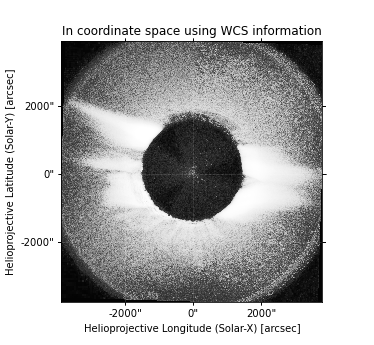
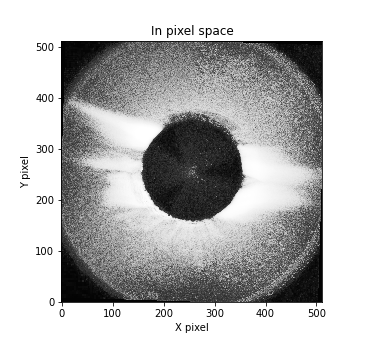
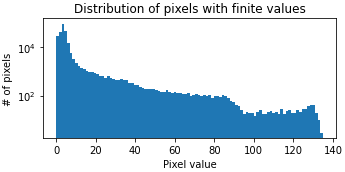

In [12]:
pathnew2 = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images copy/'
rep_new_file_path2 = '/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/A/Rep_Images/20091218_rep_med.fts'
repdata2, repheader2 = sunpy.io.fits.read(rep_new_file_path2)[0] 
repheader2['cunit1'] = 'arcsec' 
repheader2['cunit2'] = 'arcsec'

repmap2 = sunpy.map.Map(repdata2,repheader2)
repmap2

In [77]:
repheader2

FileHeader([('SIMPLE', True),
            ('BITPIX', -32),
            ('NAXIS', 2),
            ('NAXIS1', 512),
            ('NAXIS2', 512),
            ('DATE-OBS', '2017-08-21T18:05:00.007'),
            ('TIME_OBS', ''),
            ('FILEORIG', 'H82103UJ.402'),
            ('SEB_PROG', 'SERIES'),
            ('SYNC', False),
            ('SPWX', True),
            ('EXPCMD', 0.70144),
            ('EXPTIME', -1.0),
            ('DSTART1', 1),
            ('DSTOP1', 512),
            ('DSTART2', 1),
            ('DSTOP2', 512),
            ('P1COL', 51),
            ('P2COL', 2098),
            ('P1ROW', 1),
            ('P2ROW', 2048),
            ('R1COL', 129),
            ('R2COL', 2176),
            ('R1ROW', 51),
            ('R2ROW', 2098),
            ('RECTIFY', True),
            ('RECTROTA', 1),
            ('LEDCOLOR', 'NONE'),
            ('LEDPULSE', 0),
            ('OFFSET', 600),
            ('BIASMEAN', 672.253),
            ('BIASSDEV', 0.02),
            ('GAIN

In [87]:
timelist

['2008-01-25T09:35:17.704',
 '2008-01-25T09:45:17.704',
 '2008-01-25T09:55:17.703',
 '2008-01-25T10:05:17.702',
 '2008-01-25T10:15:17.702',
 '2008-01-25T10:25:17.702',
 '2008-01-25T10:35:17.699',
 '2008-01-25T10:45:17.699',
 '2008-01-25T10:55:17.710',
 '2008-01-25T11:05:17.698',
 '2008-01-25T11:15:17.697',
 '2008-01-25T11:25:17.701',
 '2008-01-25T11:35:17.698',
 '2008-01-25T11:45:17.696',
 '2008-01-25T11:55:17.704',
 '2008-01-25T12:05:17.695',
 '2008-01-25T12:15:17.694',
 '2008-01-25T12:25:17.704',
 '2008-01-25T12:35:17.691',
 '2008-01-25T12:45:17.691',
 '2008-01-25T12:55:17.700',
 '2008-01-25T13:05:17.688',
 '2008-01-25T13:15:17.687',
 '2008-01-25T13:25:17.688',
 '2008-01-25T13:35:17.687',
 '2008-01-25T13:45:17.685',
 '2008-01-25T13:55:17.685',
 '2008-01-25T14:05:17.684',
 '2008-01-25T14:15:17.684',
 '2008-01-25T14:25:17.695',
 '2008-01-25T14:35:17.681',
 '2008-01-25T14:45:17.681',
 '2008-01-25T14:55:17.691',
 '2008-01-25T15:05:17.679',
 '2008-01-25T15:15:17.680',
 '2008-01-25T15:25:1

In [89]:
timelist

['2008-01-25T09:35:00.005',
 '2008-01-25T09:45:00.004',
 '2008-01-25T09:55:00.006',
 '2008-01-25T10:05:00.004',
 '2008-01-25T10:15:00.004',
 '2008-01-25T10:25:00.006',
 '2008-01-25T10:35:00.004',
 '2008-01-25T10:45:00.004',
 '2008-01-25T10:55:00.006',
 '2008-01-25T11:05:00.005',
 '2008-01-25T11:15:00.005',
 '2008-01-25T11:25:00.013',
 '2008-01-25T11:35:00.004',
 '2008-01-25T11:45:00.005',
 '2008-01-25T11:55:00.008',
 '2008-01-25T12:05:00.005',
 '2008-01-25T12:15:00.005',
 '2008-01-25T12:25:00.006',
 '2008-01-25T12:35:00.004',
 '2008-01-25T12:45:00.004',
 '2008-01-25T12:55:00.006',
 '2008-01-25T13:05:00.004',
 '2008-01-25T13:15:00.004',
 '2008-01-25T13:25:00.004',
 '2008-01-25T13:35:00.004',
 '2008-01-25T13:45:00.004',
 '2008-01-25T13:55:00.006',
 '2008-01-25T14:05:00.005',
 '2008-01-25T14:15:00.004',
 '2008-01-25T14:25:00.006',
 '2008-01-25T14:35:00.004',
 '2008-01-25T14:45:00.004',
 '2008-01-25T14:55:00.005',
 '2008-01-25T15:05:00.004',
 '2008-01-25T15:15:00.004',
 '2008-01-25T15:25:0

In [90]:
timewrite

'20080125_134500_0P4c1A.fts'

In [105]:
stripped = stripped[:-2] + '00'

'20080125_133500'

In [147]:
path = '/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/A/'
parent_list = os.listdir('/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/A/Rep_Images') #201708{}".format(day))
path2 = '/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/B/'
parent_list2 = os.listdir('/Users/crura/Desktop/Research/2010_Images/New_Images_Shaela/B/Rep_Images') #201708{}".format(day))
for child in sorted(parent_list):
    print(child)

20080125_rep_avg.fts
20080125_rep_max.fts
20080125_rep_med.fts
20080126_rep_avg.fts
20080126_rep_max.fts
20080126_rep_med.fts
20080127_rep_avg.fts
20080127_rep_max.fts
20080127_rep_med.fts
20080128_rep_avg.fts
20080128_rep_max.fts
20080128_rep_med.fts
20080129_rep_avg.fts
20080129_rep_max.fts
20080129_rep_med.fts
20080130_rep_avg.fts
20080130_rep_max.fts
20080130_rep_med.fts
20080131_rep_avg.fts
20080131_rep_max.fts
20080131_rep_med.fts
20080201_rep_avg.fts
20080201_rep_max.fts
20080201_rep_med.fts
20080202_rep_avg.fts
20080202_rep_max.fts
20080202_rep_med.fts
20080203_rep_avg.fts
20080203_rep_max.fts
20080203_rep_med.fts
20080204_rep_avg.fts
20080204_rep_max.fts
20080204_rep_med.fts
20080205_rep_avg.fts
20080205_rep_max.fts
20080205_rep_med.fts
20080206_rep_avg.fts
20080206_rep_max.fts
20080206_rep_med.fts
20080207_rep_avg.fts
20080207_rep_max.fts
20080207_rep_med.fts
20080208_rep_avg.fts
20080208_rep_max.fts
20080208_rep_med.fts
20080209_rep_avg.fts
20080209_rep_max.fts
20080209_rep_

In [148]:
for child in sorted(parent_list2):
    print(child)

20080125_rep_avg.fts
20080125_rep_max.fts
20080125_rep_med.fts
20080126_rep_avg.fts
20080126_rep_max.fts
20080126_rep_med.fts
20080127_rep_avg.fts
20080127_rep_max.fts
20080127_rep_med.fts
20080128_rep_avg.fts
20080128_rep_max.fts
20080128_rep_med.fts
20080129_rep_avg.fts
20080129_rep_max.fts
20080129_rep_med.fts
20080130_rep_avg.fts
20080130_rep_max.fts
20080130_rep_med.fts
20080131_rep_avg.fts
20080131_rep_max.fts
20080131_rep_med.fts
20080201_rep_avg.fts
20080201_rep_max.fts
20080201_rep_med.fts
20080202_rep_avg.fts
20080202_rep_max.fts
20080202_rep_med.fts
20080203_rep_avg.fts
20080203_rep_max.fts
20080203_rep_med.fts
20080204_rep_avg.fts
20080204_rep_max.fts
20080204_rep_med.fts
20080205_rep_avg.fts
20080205_rep_max.fts
20080205_rep_med.fts
20080206_rep_avg.fts
20080206_rep_max.fts
20080206_rep_med.fts
20080207_rep_avg.fts
20080207_rep_max.fts
20080207_rep_med.fts
20080208_rep_avg.fts
20080208_rep_max.fts
20080208_rep_med.fts
20080209_rep_avg.fts
20080209_rep_max.fts
20080209_rep_

In [149]:
for child1 in sorted(parent_list):
    for child2 in sorted(parent_list2):
        if child1 == child2:
            print('yay')

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


In [150]:
sorted(parent_list) == sorted(parent_list2)

True

In [151]:
np.setdiff1d(parent_list,parent_list2) # sorts elements found in list 1 that are not found in list 2

array([], dtype='<U20')

In [44]:
pathnew2 = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images copy/'
rep_new_file_path2 = '/Users/crura/Desktop/Research/eclipse/psi_final_pb_raw_001.fits'
repdata2, repheader2 = sunpy.io.fits.read(rep_new_file_path2)[0] 
repheader2['cunit1'] = 'arcsec' 
repheader2['cunit2'] = 'arcsec'

repmap2 = sunpy.map.Map(repdata2,repheader2)
repmap2

TypeError: Cannot parse "pB" as a Quantity. It does not start with a number.

TypeError: Cannot parse "pB" as a Quantity. It does not start with a number.

 [sunpy.map.mapbase]
 [sunpy.map.mapbase]
 [sunpy.map.mapbase]
 [sunpy.map.mapbase]
 [sunpy.map.mapbase]


<sunpy.map.mapbase.GenericMap object at 0x7f9ff0697790>
SunPy Map
---------
Observatory:		 NSO-GONG
Instrument:		 
Detector:		 
Measurement:		 676.8
Wavelength:		 676.8
Observation Date:	 2009-12-26 00:00:00
Exposure Time:		 0.000000 s
Dimension:		 [360. 180.] pix
Coordinate System:	 heliographic_carrington
Scale:			 [1.        0.0111111] arcsec / pix
Reference Pixel:	 [179.5  89.5] pix
Reference Coord:	 [229.   0.] arcsec                   
array([[ 2.8494956,  2.8496053,  2.8497112, ...,  2.8483763,  2.8487535,
         2.8491266],
       [ 2.8585851,  2.858423 ,  2.8582654, ...,  2.856751 ,  2.85736  ,
         2.8579714],
       [ 1.6922756,  2.5629184,  2.8810306, ...,  2.6081896,  2.5696225,
         2.6180165],
       ...,
       [-1.5286121, -1.5257916, -1.5230426, ..., -1.6632111, -1.6232514,
        -1.6120275],
       [-1.797562 , -1.7953491, -1.7931795, ..., -1.8024857, -1.800802 ,
        -1.799161 ],
       [-1.8840969, -1.8832492, -1.8824137, ..., -1.8860308, -1.8853743,
        -1.8847299]], dtype=float32)
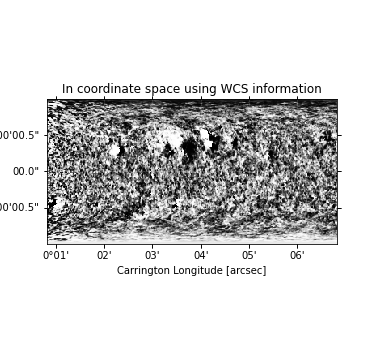
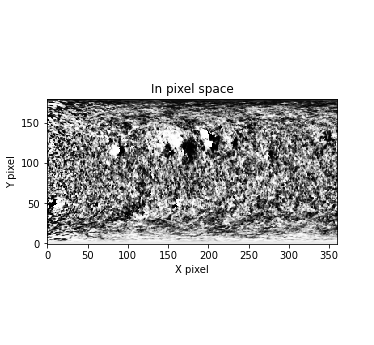
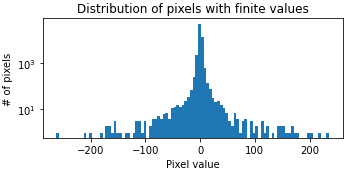

In [2]:
import sunpy.version
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import scipy as sci

pathnew = '/Users/crura/Desktop/Research/eclipse/processed/Rep_Images/'
rep_new_file_path ='/Users/crura/Desktop/Research/Shaela/magnetograms/mrzqs091226t0554c2091_049.fits'
repdata, repheader = sunpy.io.fits.read(rep_new_file_path)[0] 
repheader['cunit1'] = 'arcsec' 
repheader['cunit2'] = 'arcsec'

repmap = sunpy.map.Map(repdata,repheader)
repmap